In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as pt
import pickle # it is used to deal with file
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
dir = '/home/saddy/python/data'
categories = ['cats','dogs']
data = []
for category in categories:
    path=os.path.join(dir,category) # It join category which is cat and dog in  path
    label = categories.index(category) # it give label of categories i.e 1 and 0
    

    for pic in os.listdir(path):
        imgpath = os.path.join(path,pic) # it gives path of image
        img = cv2.imread(imgpath,0)
        try:
           img = cv2.resize(img,(50,50))
           image = np.array(img).flatten() # conversion of 2D array in 1D
           data.append([image,label])  # 9
        except Exception as e:
            pass

       
    
file = open('data.pickle','wb')
pickle.dump(data,file)
file.close
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
file = open('data.pickle','rb')
data = pickle.load(file)
file.close

<function BufferedReader.close>

In [30]:
random.shuffle(data)
features=[]
labels = []

for feature,label in data:
    features.append(feature)
    labels.append(label)

xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size=0.20)
# creating Model

model = SVC(C=10,kernel='poly',gamma='auto')

In [31]:
model.fit(xtrain, ytrain)


SVC(C=10, gamma='auto', kernel='poly')

accuracy :  0.5111111111111111
prediction is :  cats


<function matplotlib.pyplot.show(*args, **kw)>

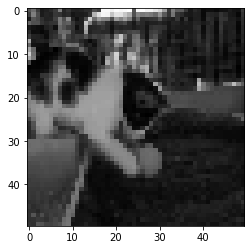

In [32]:
predict = model.predict(xtest)
accuracy = model.score(xtest, ytest)
categories = ['cats', 'dogs']
print('accuracy : ', accuracy)
print('prediction is : ', categories[predict[3]])
mypet = xtest[3].reshape(50,50)
pt.imshow(mypet, cmap= 'gray')
pt.show